In [1]:
%matplotlib inline
import matplotlib.cm as cm
from matplotlib.colors import Normalize   
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
import matplotlib.transforms
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import glob, os


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/covid/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# table_path = Path('/data/schwartzao/covid-sicr/tables/20210317/')
# product_path = Path('/data/schwartzao/covid-sicr/results/')
# figures_path = Path('/data/schwartzao/covid-sicr/figures/20210317/')

table_path = Path('/Users/schwartzao/Desktop/workspace/covid-sicr/tables/20210325/')
product_path = Path('/Users/schwartzao/Desktop/workspace/covid-sicr/results/')
figures_path = Path('/Users/schwartzao/Desktop/workspace/covid-sicr/figures/20210325/')

# Week 13: April 19-25, 2020 (NOT WEEK 11)
# Week 30: August 16-22, 2020 (17 + 13)
# Week 47: December 13-19, 2020 (17 + 30)
# Week 59: March 7-13, 2021
    
weeks = ['13', '30', '47']
weeks_dates = ['Apr 19-25', 'Aug 16-22', 'Dec 13-19']

last_week = 60
last_week_date = 'March 14-20'

weeks.append(str(last_week))
weeks_dates.append(last_week_date)
print(weeks, weeks_dates)

['13', '30', '47', '60'] ['Apr 19-25', 'Aug 16-22', 'Dec 13-19', 'March 14-20']


In [3]:
# Fix region names, remove underscore
def fix_region_name(roi):
    roi = roi.replace('_', ' ')
    roi = ' '.join(roi.split(',')[::-1]).strip()
    return roi

In [4]:
df = pd.read_csv(table_path / 'fit_table_reweighted.csv')
df['roi'] = df['roi'].apply(fix_region_name)

rois = list(df.roi.unique())

# rois.remove('US')
# rois.remove('AAA Global')
# rois.remove('Canada')
# rois.remove('Brazil')

tmp = []
for roi in rois: # remove super region means
    if not roi.startswith('AA'):
        tmp.append(roi)   
        
rois = tmp

In [5]:
stats = ['Rt', 'car', 'ifr', 'ir', 'ar'] # new models
# stats = ['Rt', 'car', 'ifr'] # old models
for stat in stats:
    print(stat)
    df[f'{stat} {last_week_date}'] = 0 # AOS: this creates an additional column named this date that matches last value in range below

    for roi in rois:
        for wk in np.arange(last_week,0,-1): # set first int in arange as final week
    #         print(f"{stat} (week {wk})")
            if df.loc[df.roi==roi][f"{stat} (week {wk})"].notnull().values[0]:
                for q in df['quantile'].unique():
                    df.loc[(df.roi==roi)&(df['quantile']==q),[f'{stat} {last_week_date}']] = df.loc[(df.roi==roi)&(df['quantile']==q),[f"{stat} (week {wk})"]].values
                break

Rt
car
ifr
ir
ar


In [6]:
df = df.set_index(['roi', 'quantile']).sort_index()

In [20]:
print(df['Rt ()'])

                             R0  Rt (week 10)  Rt (week 11)  Rt (week 12)  \
roi          quantile                                                       
AA Africa    mean      2.144892      1.702503      1.594579      1.491055   
             std       1.009583      0.611123      0.546330      0.499116   
AA Americas  mean      2.937815      1.729410      1.577650      1.490814   
             std       2.005595      0.553312      0.474239      0.421733   
AA Antarctic mean           NaN           NaN           NaN           NaN   
...                         ...           ...           ...           ...   
Zimbabwe     0.5       2.041138      1.621891      1.482582      1.154737   
             0.75      2.327292      1.938710      1.809099      1.464026   
             0.975     2.933540      2.575349      2.416023      2.067058   
             mean      2.061367      1.631099      1.486980      1.171062   
             std       0.416014      0.464780      0.474024      0.433980   

In [7]:
# Handle super regions Brazil and Canada

# Brazil:
# df_Brazil = df[df.index.get_level_values('roi').str.startswith('BR')]
# df_Brazil.reset_index(inplace=True)

# superBrazil = df_Brazil.groupby('quantile').mean()
# superBrazil.reset_index(inplace=True)

# superBrazil['roi'] = 'Brazil'
# superBrazil = superBrazil.set_index(['roi', 'quantile']).sort_index()


# # Canada:

# df_Canada = df[df.index.get_level_values('roi').str.startswith('CA')]
# df_Canada.reset_index(inplace=True)

# superCanada = df_Canada.groupby('quantile').mean()
# superCanada.reset_index(inplace=True)

# superCanada['roi'] = 'Canada'
# superCanada = superCanada.set_index(['roi', 'quantile']).sort_index()

# df.append(superBrazil)

In [16]:
# Remove non-super regions (Brazil, Canada) if in df then replace with super regions
# print(superCanada)
# superCanada.to_csv(str(table_path) + '/Canada.csv')
# superBrazil.to_csv(str(table_path) + '/Brazil.csv')



In [7]:
theta_ = ["R0", 
          f"Rt (week {weeks[0]})",
          f"Rt (week {weeks[1]})",
          f"Rt (week {weeks[2]})",
          f"Rt {last_week_date}",
          
          f"car (week {weeks[0]})",
          f"car (week {weeks[1]})",
          f"car (week {weeks[2]})",
          f"car {last_week_date}",
          
          f"ifr (week {weeks[0]})",
          f"ifr (week {weeks[1]})",
          f"ifr (week {weeks[2]})",
          f"ifr {last_week_date}",
          
          f"ir (week {weeks[0]})",
          f"ir (week {weeks[1]})",
          f"ir (week {weeks[2]})",
          f"ir {last_week_date}",
          
          f"ar (week {weeks[0]})",
          f"ar (week {weeks[1]})",
          f"ar (week {weeks[2]})",
          f"ar {last_week_date}"
         ]  

def get_global3(theta):
    g_ = {}
    for q in q_:
        v = []
        w = []
        for roi in rois:
            v.append(df.loc[(roi,q),theta])
            w.append(df.loc[(roi,'mean'),'n_data_pts'])
            if np.isnan(w[-1]) or np.isnan(v[-1]):
                del(v[-1],w[-1])
                
        v = np.array(v)
        w = np.array(w)
        g = sum(v*w)/sum(w)
        df.loc[('GLOBAL', q),theta] = g
        g_[q] = g
    return g_

def afun1(x):
    return '%s' % float('%.1g' %x)

def afun2(x):
    return '%s' % float('%.2g' %x)

q_ = ['0.025','0.25','0.5','0.75','0.975']

for theta in theta_:
    g_ = get_global3(theta)
    
    if theta[0]=='R':
        print(theta+' median: '+str(afun2(g_['0.5']))+' CI: ('+
          ','.join([str(afun2(g_['0.025'])),str(afun2(g_['0.975']))])+')\n')
    else:
        print(theta+' median: '+str(afun1(g_['0.5']))+' CI: ('+
          ','.join([str(afun1(g_['0.025'])),str(afun1(g_['0.975']))])+')\n')

R0 median: 2.5 CI: (1.9,3.1)

Rt (week 13) median: 1.3 CI: (0.87,1.8)

Rt (week 30) median: 1.0 CI: (0.64,1.5)

Rt (week 47) median: 1.0 CI: (0.68,1.5)

Rt March 14-20 median: 0.87 CI: (0.57,1.5)

car (week 13) median: 0.2 CI: (0.2,0.3)

car (week 30) median: 0.2 CI: (0.2,0.3)

car (week 47) median: 0.2 CI: (0.2,0.3)

car March 14-20 median: 0.3 CI: (0.2,0.3)

ifr (week 13) median: 0.008 CI: (0.006,0.01)

ifr (week 30) median: 0.007 CI: (0.006,0.008)

ifr (week 47) median: 0.005 CI: (0.004,0.006)

ifr March 14-20 median: 0.005 CI: (0.004,0.006)

ir (week 13) median: 0.007 CI: (0.005,0.009)

ir (week 30) median: 0.04 CI: (0.03,0.05)

ir (week 47) median: 0.1 CI: (0.1,0.1)

ir March 14-20 median: 0.2 CI: (0.2,0.2)

ar (week 13) median: 0.007 CI: (0.005,0.01)

ar (week 30) median: 0.05 CI: (0.04,0.06)

ar (week 47) median: 0.2 CI: (0.1,0.7)

ar March 14-20 median: 0.4 CI: (0.3,7000000.0)



In [17]:
brazil_p = [x for x in rois if x.startswith("BR ")]
brazil_p.append('GLOBAL')

In [18]:
# Restrict the 82 ROIs for some analyses (US states, top25, China, Australia)
# dfo = pd.read_csv(table_path / 'fit_table_reweighted.csv')
dfo = pd.read_csv(table_path / 'fit_table_reweighted_super.csv') ######### TESTING
dfo['roi'] = dfo['roi'].apply(fix_region_name)
# rois = ['GLOBAL', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Ecuador', 'France', 
#         'Germany', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'South Korea', 'Netherlands', 'Peru', 
#         'Poland', 'Portugal', 'Romania', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US AK', 'US AL', 
#         'US AR', 'US AZ', 'US CA', 'US CO', 'US CT', 'US DC', 'US DE', 'US FL', 'US GA', 'US GU', 'US HI', 'US IA', 
#         'US ID', 'US IL', 'US IN', 'US KS', 'US KY', 'US LA', 'US MA', 'US MD', 'US ME', 'US MI', 'US MN', 'US MO', 
#         'US MP', 'US MS', 'US MT', 'US NC', 'US ND', 'US NE', 'US NH', 'US NJ', 'US NM', 'US NV', 'US NY', 'US OH', 
#         'US OK', 'US OR', 'US PA', 'US PR', 'US RI', 'US SC', 'US SD', 'US TN', 'US TX', 'US UT', 'US VA', 'US VI', 
#         'US VT', 'US WA', 'US WI', 'US WV', 'US WY', 'United Kingdom']

rois = brazil_p

df_top = df.loc[rois]
print("There are %d regions under consideration" % len(rois))


There are 28 regions under consideration


In [8]:
# Restrict ROIs for some analyses

dfo = pd.read_csv(table_path / 'fit_table_reweighted.csv')
dfo['roi'] = dfo['roi'].apply(fix_region_name)

rois = list(dfo.roi.unique())

roi_us = np.sort([i for i in rois if i[:2]=='US'])
# roi_other = np.sort([i for i in rois if i[:2]!='US'])
top25 = pd.read_csv(product_path / "top25.csv", index_col=0, header=None).index
top25 = top25.map(fix_region_name)
roi_other = sorted(list(top25) + ['China','Australia','Canada'])#,'Senegal','Malaysia','Honduras','Algeria'])
rois = ['GLOBAL']+ list(roi_other) + list(roi_us)  
# rois.remove('US')
# rois.remove('AA Global')


# rois.remove('Canada') # MODEL DID NOT CONVERGE FOR THESE
# rois.remove('China') # MODEL DID NOT CONVERGE FOR THESE


df_top = df.loc[rois]
# print(df_top)
print("There are %d regions under consideration" % len(rois))

There are 84 regions under consideration


### Figure 2-4

In [9]:
def clean_df(df, stat):
    result = df[stat].unstack('quantile')
    return result

def box_vs_roi(df, stat, labl, sort=True, low=0.12, high=22, palette=None, ax=None, subtract=None):
    sns.set(rc={'ytick.left': True, 'xtick.bottom': True})
    if ax is None:
        fig = plt.figure(figsize=(15, 5))
    else:
        fig = plt.gcf()
    clean = clean_df(df, stat)
    clean = clean.iloc[:, :5] # Only quantiles
    if sort is True:
        clean = clean.sort_values('0.5', ascending=False)
    elif sort is not False:
        clean = clean.loc[sort]
    clean = clean.loc[['GLOBAL'] + list(clean.index.drop('GLOBAL'))]
    if subtract:
        clean2 = clean_df(df, subtract)
        clean2 = clean2.loc[clean.index]
        clean2 = clean2.iloc[:, :5] # Only quantiles
        diffs = np.log10(clean['0.5'] / clean2['0.5'])
#         diffs = (clean['0.5'] - clean2['0.5'])#np.log10(clean2['0.5'] / clean['0.5'])
        cmap = cm.seismic #cm.RdBu_r
        norm = Normalize(vmin=-1, vmax=1)
        palette = [cmap(norm(diff)) for diff in diffs]
    else:
        palette = None
    ax = sns.boxplot(data=clean.T, whis=99, ax=ax, palette=palette)
    for i, box in enumerate(ax.artists):
        box.set_edgecolor('black')
        if palette is None:
            box.set_facecolor('white')
    xlabels = ax.get_xticklabels()
    ax.set_xticklabels(xlabels, rotation=70, fontsize=10);
    ax.set_yscale('log')
    if True:#'R' in stat:
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x,_: "%d"%x if x>=1 else '%.1g'%x))
        ax.yaxis.set_minor_formatter(FuncFormatter(lambda x,_: "%d"%x if x in [2, 5] else ''))
    dx = 8/72.; dy = 0/72. 
    ax.margins(x=0.01, y=0.01)
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
        label.set_transform(label.get_transform() + offset)
    ax.set_xlim(-1, len(clean))
    ax.set_ylim(low, high)
    ax.set_xlabel('')
    ax.set_ylabel(labl, fontsize=18);
    return list(clean.index)

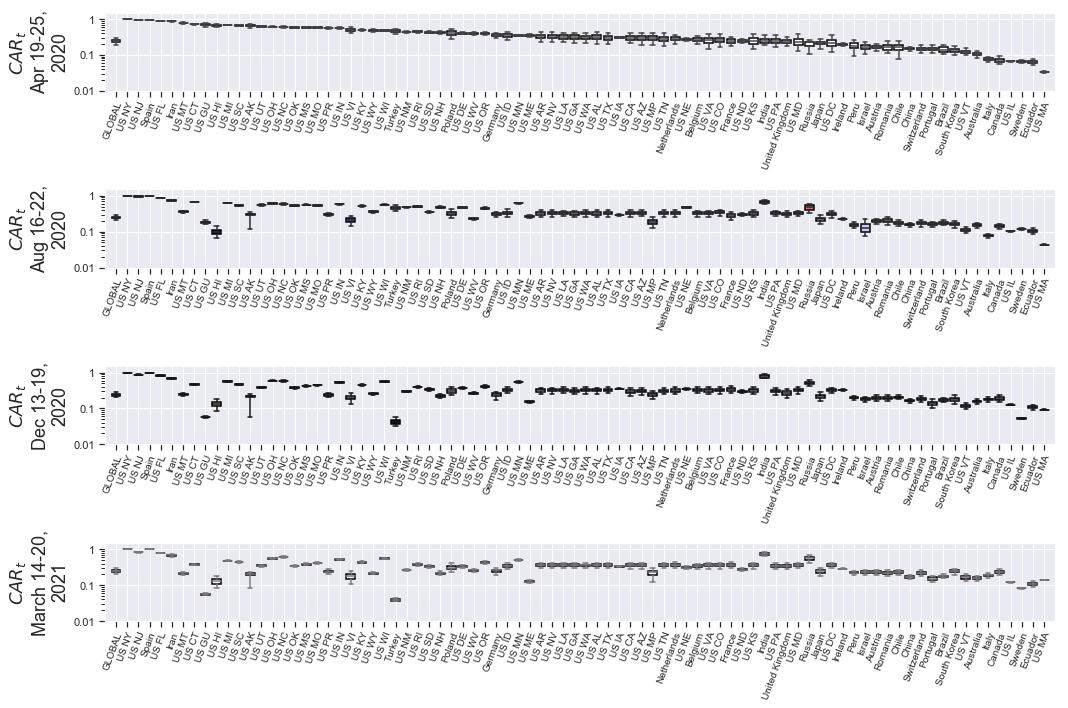

In [15]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))

rois = box_vs_roi(df_top, f'car (week {weeks[0]})', f'$CAR_t$\n{weeks_dates[0]},\n2020', 
                  ax=ax[0], low=1e-2, high=1.5,);
ax[0].xaxis.grid(True)

box_vs_roi(df_top, f'car (week {weeks[1]})', f'$CAR_t$ \n{weeks_dates[1]},\n2020', low=1e-2, high=1.5, 
           ax=ax[1], subtract=f'car (week {weeks[0]})', sort=rois);
ax[1].xaxis.grid(True)

box_vs_roi(df_top, f'car (week {weeks[2]})', f'$CAR_t$\n{weeks_dates[2]},\n2020', low=1e-2, high=1.5, 
           ax=ax[2], subtract=f'car (week {weeks[1]})', sort=rois);
ax[2].xaxis.grid(True)

box_vs_roi(df_top, f'car {weeks_dates[3]}', f'$CAR_t$\n{weeks_dates[3]},\n2021', low=1e-2, high=1.5, 
           ax=ax[3], subtract=f'car (week {weeks[2]})', sort=rois);
ax[3].xaxis.grid(True)

plt.tight_layout()
plt.savefig(product_path / 'Fig_car0_2_may24.png', dpi=400)
plt.savefig(figures_path / f'Bar_car_{weeks[0]}_{weeks[1]}_{weeks[2]}_{weeks[3]}.png', dpi=400)


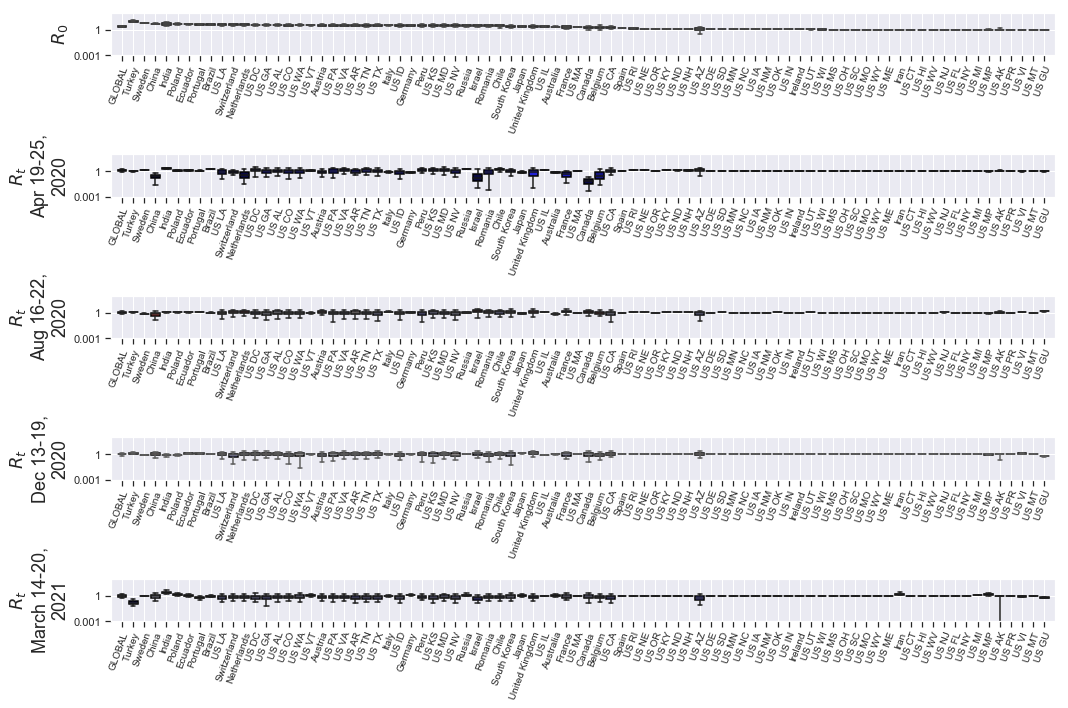

In [11]:
fig, ax = plt.subplots(5, 1, figsize=(15, 10))

rois = box_vs_roi(df_top, 'R0', '$R_0$', 
                  ax=ax[0], low=1e-3, high=1e2,);
ax[0].xaxis.grid(True)

box_vs_roi(df_top, f'Rt (week {weeks[0]})', f'$R_t$ \n{weeks_dates[0]},\n2020', low=1e-3, high=1e2, 
           ax=ax[1], subtract='R0', sort=rois);
ax[1].xaxis.grid(True)

box_vs_roi(df_top, f'Rt (week {weeks[1]})', f'$R_t$ \n{weeks_dates[1]},\n2020', low=1e-3, high=1e2, 
           ax=ax[2], subtract=f'Rt (week {weeks[0]})', sort=rois);
ax[2].xaxis.grid(True)

box_vs_roi(df_top, f'Rt (week {weeks[2]})', f'$R_t$ \n{weeks_dates[2]},\n2020', low=1e-3, high=1e2, 
           ax=ax[3], subtract=f'Rt (week {weeks[1]})', sort=rois);
ax[3].xaxis.grid(True)


box_vs_roi(df_top, f'Rt {weeks_dates[3]}', f'$R_t$ \n{weeks_dates[3]},\n2021', low=1e-3, high=1e2, 
           ax=ax[4], subtract=f'Rt (week {weeks[2]})', sort=rois);
ax[4].xaxis.grid(True)


plt.tight_layout()
plt.savefig(product_path / 'Fig_R0_2_may24.png', dpi=400)
plt.savefig(figures_path / f'Bar_r_{weeks[0]}_{weeks[1]}_{weeks[2]}_{weeks[3]}.png', dpi=400)


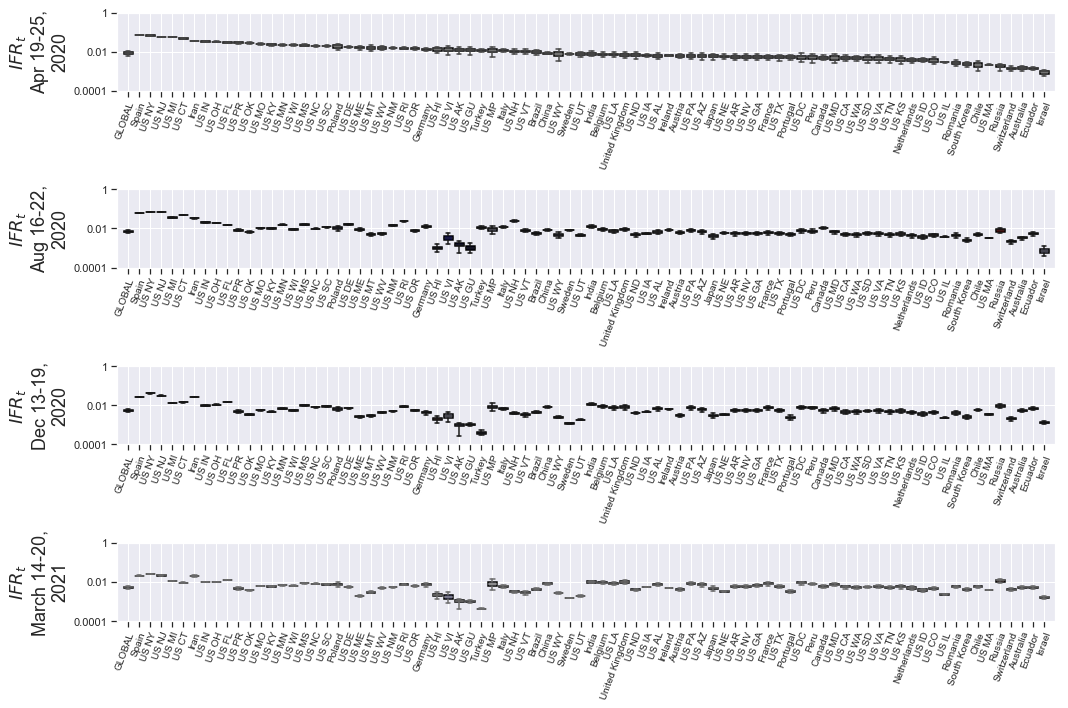

In [12]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))

rois = box_vs_roi(df_top, f'ifr (week {weeks[0]})', f'$IFR_t$ \n{weeks_dates[0]},\n2020', 
                  ax=ax[0], low=1e-4, high=1,);
ax[0].xaxis.grid(True)

box_vs_roi(df_top, f'ifr (week {weeks[1]})', f'$IFR_t$ \n{weeks_dates[1]},\n2020', low=1e-4, high=1, 
           ax=ax[1], subtract=f'ifr (week {weeks[0]})', sort=rois);
ax[1].xaxis.grid(True)

box_vs_roi(df_top, f'ifr (week {weeks[2]})', f'$IFR_t$ \n{weeks_dates[2]},\n2020', low=1e-4, high=1, 
           ax=ax[2], subtract=f'ifr (week {weeks[1]})', sort=rois);
ax[2].xaxis.grid(True)

box_vs_roi(df_top, f'ifr {weeks_dates[3]}', f'$IFR_t$ \n{weeks_dates[3]},\n2021', low=1e-4, high=1, 
           ax=ax[3], subtract=f'ifr (week {weeks[2]})', sort=rois);
ax[3].xaxis.grid(True)


plt.tight_layout()
plt.savefig(figures_path / f'Bar_ifr_{weeks[0]}_{weeks[1]}_{weeks[2]}_{weeks[3]}.png', dpi=400)

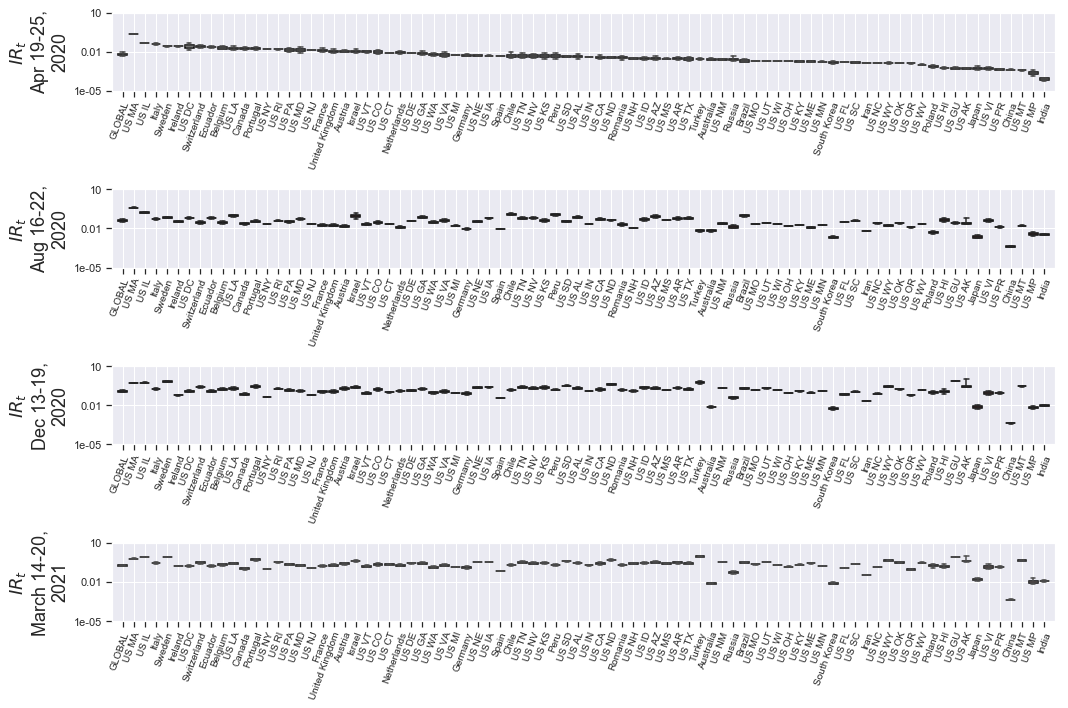

In [13]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
rois = box_vs_roi(df_top, f'ir (week {weeks[0]})', f'$IR_t$ \n{weeks_dates[0]},\n2020', 
                  ax=ax[0], low=1e-5, high=10,);
ax[0].xaxis.grid(True)

box_vs_roi(df_top, f'ir (week {weeks[1]})', f'$IR_t$ \n{weeks_dates[1]},\n2020', low=1e-5, high=10, 
           ax=ax[1], subtract=f'ir (week {weeks[0]})', sort=rois);
ax[1].xaxis.grid(True)

box_vs_roi(df_top, f'ir (week {weeks[2]})', f'$IR_t$ \n{weeks_dates[2]},\n2020', low=1e-5, high=10, 
           ax=ax[2], subtract=f'ir (week {weeks[1]})', sort=rois);
ax[2].xaxis.grid(True)

box_vs_roi(df_top, f'ir {weeks_dates[3]}', f'$IR_t$ \n{weeks_dates[3]},\n2021', low=1e-5, high=10, 
           ax=ax[3], subtract=f'ir (week {weeks[2]})', sort=rois);
ax[3].xaxis.grid(True)


plt.tight_layout()
plt.savefig(figures_path / f'Bar_ir_{weeks[0]}_{weeks[1]}_{weeks[2]}_{weeks[3]}.png', dpi=400)

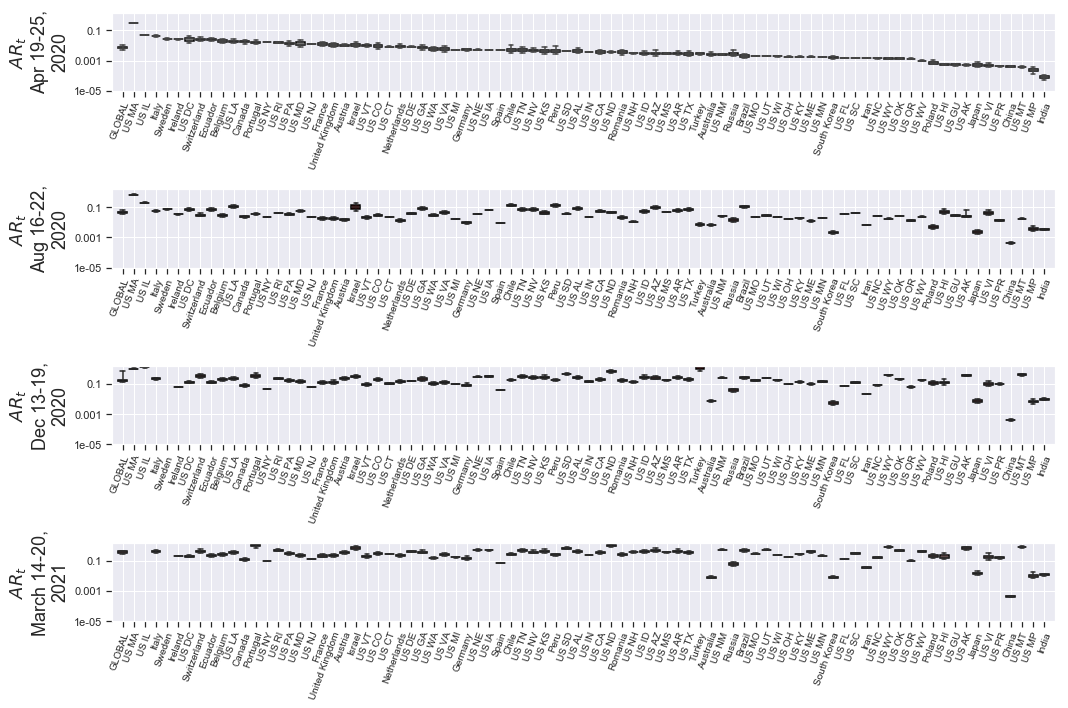

In [14]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))

rois = box_vs_roi(df_top, f'ar (week {weeks[0]})', f'$AR_t$\n{weeks_dates[0]},\n2020', 
                  ax=ax[0], low=1e-5, high=1.5,);
ax[0].xaxis.grid(True)

box_vs_roi(df_top, f'ar (week {weeks[1]})', f'$AR_t$\n{weeks_dates[1]},\n2020', low=1e-5, high=1.5, 
           ax=ax[1], subtract=f'ar (week {weeks[0]})', sort=rois);
ax[1].xaxis.grid(True)

box_vs_roi(df_top, f'ar (week {weeks[2]})', f'$AR_t$\n{weeks_dates[2]},\n2020', low=1e-5, high=1.5, 
           ax=ax[2], subtract=f'ar (week {weeks[1]})', sort=rois);
ax[2].xaxis.grid(True)

box_vs_roi(df_top, f'ar {weeks_dates[3]}', f'$AR_t$\n{weeks_dates[3]},\n2021', low=1e-5, high=1.5,
           ax=ax[3], subtract=f'ar (week {weeks[2]})', sort=rois);
ax[3].xaxis.grid(True)


plt.tight_layout()
plt.savefig(figures_path / f'Bar_ar_{weeks[0]}_{weeks[1]}_{weeks[2]}_{weeks[3]}.png', dpi=400)

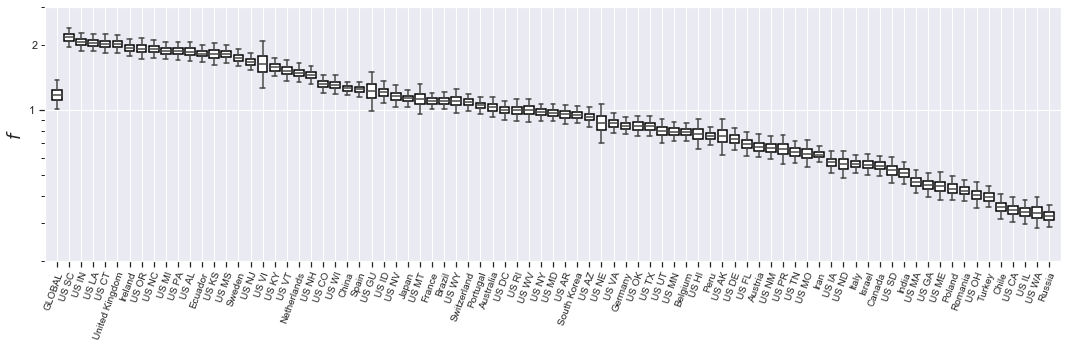

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

rois = box_vs_roi(df_top, 'extra_std', '$f$', 
                  ax=ax, low=0.2, high=3,);
ax.xaxis.grid(True)

# box_vs_roi(df_top, 'Rt (week 2)', '$R_t$ (week 2)', low=1e-4, high=0.5e2, 
#            ax=ax[1], subtract='R0', sort=rois);
# ax[1].xaxis.grid(True)

# box_vs_roi(df_top, 'Rt (May 24th)', '$R_t$ (May 24th)', low=1e-4, high=0.5e2, 
#            ax=ax[2], subtract='Rt (week 2)', sort=rois);
# ax[2].xaxis.grid(True)
plt.tight_layout()

plt.savefig(product_path / 'Fig_f.png', dpi=400)

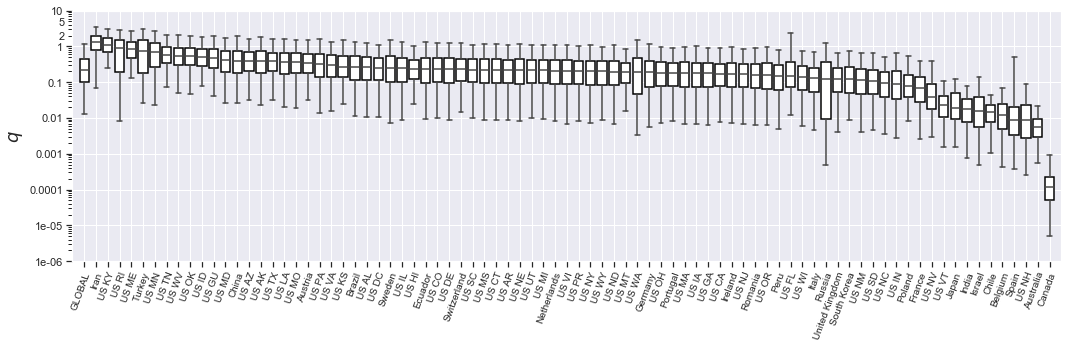

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
rois = box_vs_roi(df_top, 'q', '$q$', 
                  ax=ax, low=1e-6, high=10,);
ax.xaxis.grid(True)

plt.tight_layout()

plt.savefig(product_path / 'Fig_q.png', dpi=400)